In [1]:
from pathlib import Path

import tensorflow as tf
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

from src.models.fetch_data_from_hdf5 import get_tf_data
from src.models.models_2d import CustomModel, unet_model

In [2]:

project_dir = Path("../").resolve()
model_path = project_dir / "models/model_0-75_alpha_4_gtvl_256/checkpoint"
image_size = (256, 256)

In [3]:
model_path

PosixPath('/home/val/python_wkspce/plc_seg/models/model_0-25_alpha_4_gtvl_256/checkpoint')

In [4]:
file_test = h5py.File("/home/val/python_wkspce/plc_seg/data/processed/2d_pet_normalized/test.hdf5", "r")
file_train = h5py.File("/home/val/python_wkspce/plc_seg/data/processed/2d_pet_normalized/train.hdf5", "r")

In [5]:
clinical_df = pd.read_csv("../data/clinical_info.csv").set_index("patient_id")

In [6]:
bs = 4
data_test = get_tf_data(
        file_test,
        clinical_df,
        output_shape=(256, 256),
        random_slice=False,
    ).batch(bs).as_numpy_iterator()

In [7]:
model_ = unet_model(3, input_shape=image_size + (3, ))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model = CustomModel(model_.inputs, model_.outputs)
# We don't passs a loss or metrics here.
model.compile(
    optimizer=optimizer,
    run_eagerly=False,
)


In [8]:
model.load_weights(model_path)


In [9]:
bs = 4
data_train = get_tf_data(
        file_train,
        clinical_df,
        output_shape=(224, 224),
        random_slice=False,
    ).batch(bs)

In [10]:
x, y_true, plc_status, sick_lung_axis = next(data_test)

In [11]:
y_pred = model(x)

In [12]:
np.max(x[b,:,:,1])

NameError: name 'b' is not defined

PLC status [0.]


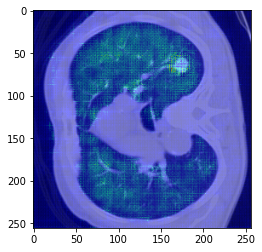

In [18]:
b=2
print(f"PLC status {plc_status[b]}")
plt.imshow(x[b,:,:,0],cmap='gray')
plt.imshow(y_pred[b, :,:,1], cmap='jet', alpha=0.5)

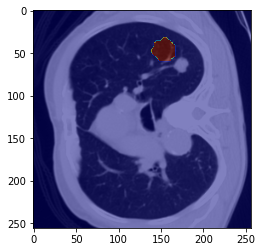

In [19]:
plt.imshow(x[b,:,:,0],cmap='gray')
plt.imshow(y_true[b, :,:,1], cmap='jet', alpha=0.5)

In [ ]:
x_train, y_true_train, plc_status_train, sick_lung_axis = next(data_train.as_numpy_iterator())
y_pred_train = model(x_train)
y_pred_b_train = np.copy(y_pred_train)
y_pred_b_train[y_pred_b_train>=0.5] = 1
y_pred_b_train[y_pred_b_train<0.5] = 0


In [ ]:
b=0
print(f"PLC status {plc_status[b]}")
plt.imshow(x_train[b,:,:,0],cmap='gray')
plt.imshow(y_pred_train[b, :,:,0], cmap='jet', alpha=0.5)

In [ ]:
plt.imshow(x_train[b,:,:,0],cmap='gray')
plt.imshow(y_true_train[b, :,:,0], cmap='jet', alpha=0.5)